In [ ]:
# This notebook demonstrates some techniques for fitting and evaluating non-linear regression models

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Generate some data to explore

np.random.seed(1)
C = 14
n = 65
x = np.linspace(0, 20, n)  
y = x**3 / 20 - x**2 - x + C * np.random.randn(n)

x = x.reshape(-1, 1)  # convert x and y from flat array to a 1-column matrix 
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

DEGS = (1, 3, 7, 11)

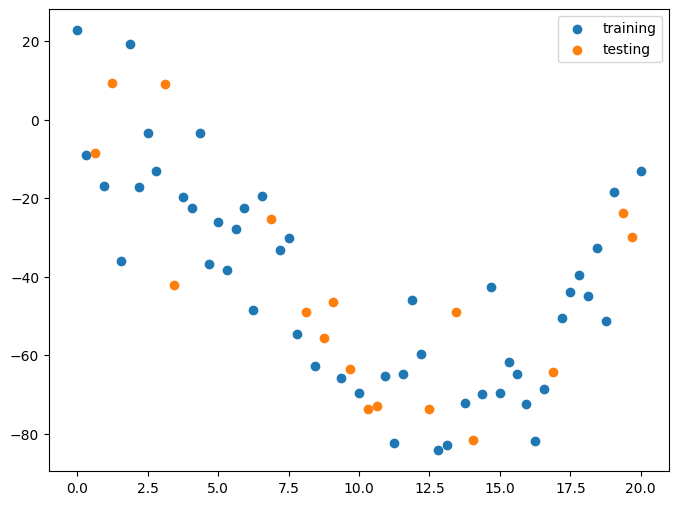

In [3]:
#This function helps you visualize the training and testing sets 

def data_scatter():
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label="training")
    plt.scatter(X_test, y_test, label="testing")
    plt.legend(loc="best")

    return

data_scatter()

In [4]:
# This function generates a new feature matrix consisting of all polynomial combinations of the features 
# with degree less than or equal to the specified degree [1,3,7,11]
# then uses the new features to fit a linear regression model and make predictions 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def a_one():
    preds = None
    DEGS = (1, 3, 7, 11)
    fit_list=[]
    for num in DEGS:
        poly = PolynomialFeatures(degree=num)
        #print(X_train)
        X_poly = poly.fit_transform(X_train)
        #print(X_poly)
        #X_train, X_test, y_train, y_test = train_test_split(X_poly, y) 
        linreg = LinearRegression().fit(X_poly, y_train)
        
        m = np.linspace(0, 20, 100).reshape(-1, 1)
        m_poly = poly.fit_transform(m)
        fit = linreg.predict(m_poly)
        fit_t = np.transpose(fit)
        fit_list.append(fit_t)
    
    #print(fit_list[0].shape)
    preds= np.vstack((fit_list[0], fit_list[1], fit_list[2], fit_list[3]))
    #print(preds.shape)

    return preds

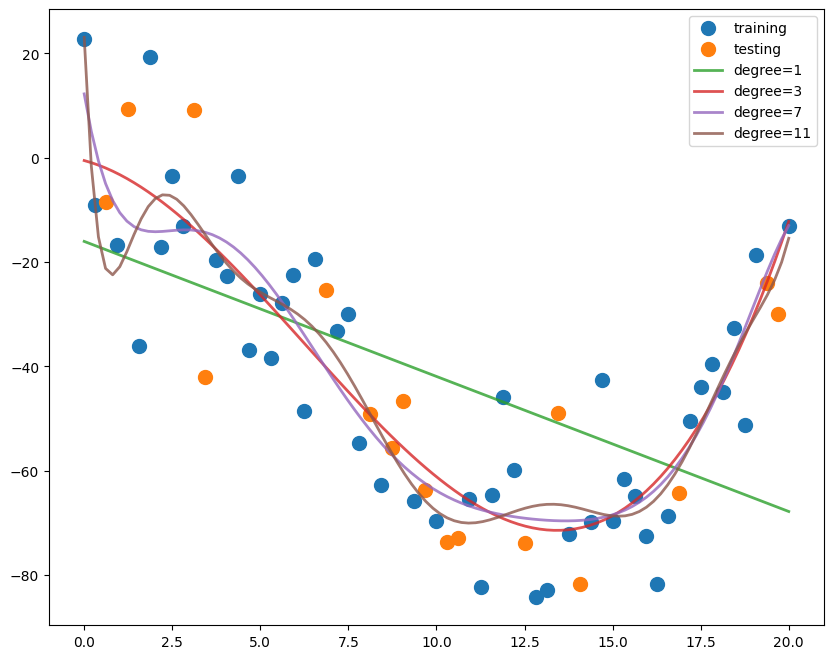

In [5]:
# plotting the predictions generated by the previous function and the origional data

def plot_one(predictions):
    x_values = np.linspace(0, 20, 100)

    plt.figure(figsize=(10, 8))
    plt.plot(X_train, y_train, "o", label="training", markersize=10)
    plt.plot(X_test, y_test, "o", label="testing", markersize=10)

    for i, deg in enumerate(DEGS):
        plt.plot(
            x_values,
            predictions[i],
            alpha=0.8,
            lw=2,
            label=f"degree={deg}",)

    plt.legend(loc="best")

    return

plot_one(a_one())

In [6]:
#This function returns r squared values for each degree [1,3,7,11] on the training and test sets 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


def a_two():

    DEGS = (1, 3, 7, 11)
    r2_train = []
    r2_test = []
    
    for num in DEGS:
        poly = PolynomialFeatures(degree=num)
        #print(X_train)
        X_poly = poly.fit_transform(X_train)
        X_poly_test= poly.fit_transform(X_test)
        #print(X_poly)
        linreg = LinearRegression().fit(X_poly, y_train)
        
        train_score = linreg.score(X_poly, y_train)
        r2_train.append(train_score)
        test_score = linreg.score(X_poly_test, y_test)
        r2_test.append(test_score)

    return r2_train, r2_test

a_two()

([0.3423976029329838,
  0.7751852856909016,
  0.7922185672201318,
  0.8162965349303593],
 [0.23511420814305894,
  0.7844384374724473,
  0.7595041638719316,
  0.7637314950363894])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e+03, tolerance: 3.324e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e+03, tolerance: 3.324e+00
  model = cd_fast.enet_coordinate_descent(


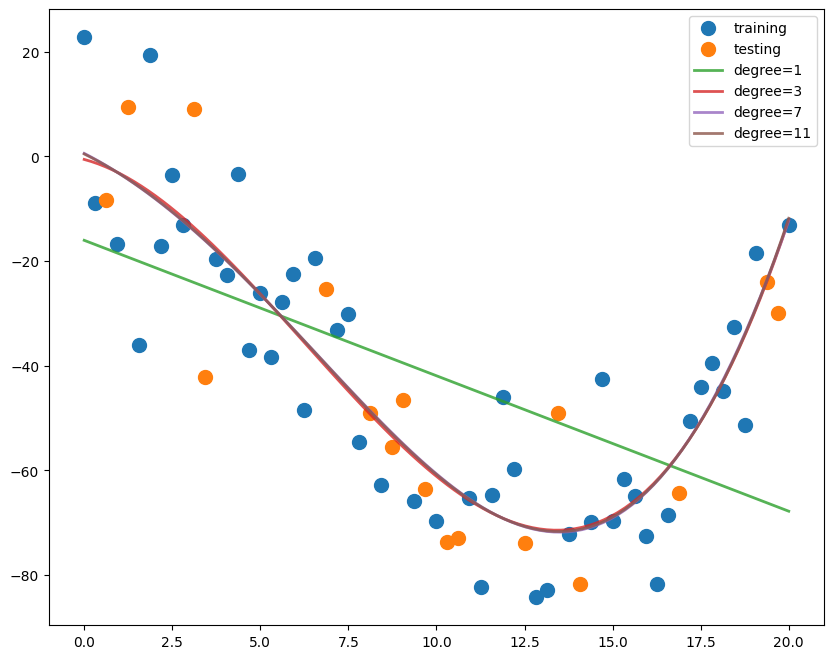

In [7]:
# This function generates a new feature matrix consisting of all polynomial combinations of the features 
# with degree less than or equal to the specified degree [1,3,7,11]
# then uses the new features to fit a lasso regression model ( L1 regularization) and make predictions 
# Regularization reduces variance of the estimates. Larger alpha values specify stronger regularization.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score

def a_four_b():

    preds = []
    DEGS = (1, 3, 7, 11)
    fit_list=[]
    for num in DEGS:
        poly = PolynomialFeatures(degree=num)
        #print(X_train)
        X_poly = poly.fit_transform(X_train)
        #print(X_poly)
         
        linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_poly, y_train)
        
        m = np.linspace(0, 20, 100).reshape(-1, 1)
        m_poly = poly.fit_transform(m)
        fit = linlasso.predict(m_poly)
        fit_t = np.transpose(fit)
        fit_list.append(fit_t)
    
    #print(fit_list[0].shape)
    preds= np.vstack((fit_list[0], fit_list[1], fit_list[2], fit_list[3]))

    return preds
plot_one(a_four_b())

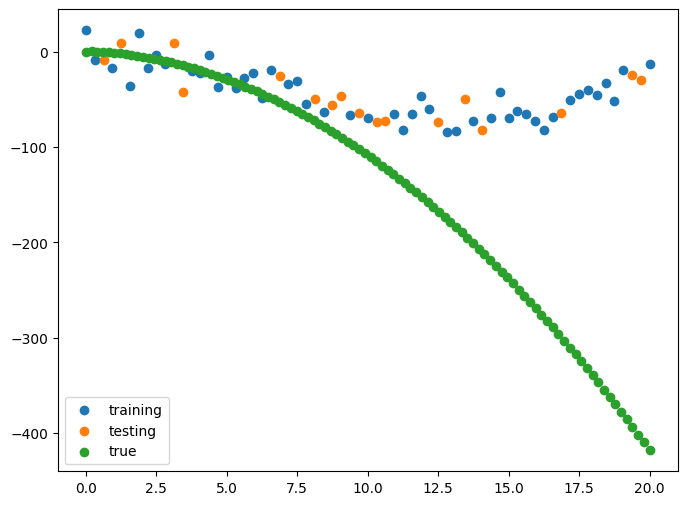

In [8]:
# This plot demonstrates that even if you acheive good model performance on the test and train data
# the true population of intrest may not be represented by your data sample

# make some pretend true data
true_test_X = np.linspace(0, 20, 100).reshape(-1, 1)    
true_test_y= np.array([(xi**(3/20)-xi**2-xi) for xi in true_test_X])

# plot it
def true_plot():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label="training")
    plt.scatter(X_test, y_test, label="testing")
    plt.scatter(true_test_X, true_test_y, label="true")
    plt.legend(loc="best")
    return
    
true_plot()

In [9]:
# This function returns the degree with the lowest r squared score

def a_four_c():

    #-------------create pretend true test set
    true_test_X = np.linspace(0, 20, 100).reshape(-1, 1)
    true_test_y= np.array([(xi**(3/20)-xi**2-xi) for xi in true_test_X])
    #-------------------------------------
    best_deg = []
    DEGS = [1, 3, 7, 11]
    score_list=[]
    for num in DEGS:
        poly = PolynomialFeatures(degree=num)
        tt_poly_X = poly.fit_transform(true_test_X)
        
        X_train, X_test, y_train, y_test = train_test_split(tt_poly_X, true_test_y, random_state = 0)
        
        linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train, y_train)
        
        score = linlasso.score(X_test, y_test )
        score_list.append(score)
    
    top_index = np.argmax(score_list)
    #print(top_index)
    best_deg=DEGS[top_index]

    return best_deg

a_four_c()

3